# Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

In [97]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [98]:
df = pd.read_csv('C:/Users/Karan Tupe/Downloads/hotel_sales.csv')

hotel_sales=pd.DataFrame(df)
hotel_sales.head()

,Unnamed: 0,date,sales
0,0,2014-01-01 05:49:12,1742
1,1,2014-01-02 05:49:12,1808
2,2,2014-01-03 05:49:12,1887
3,3,2014-01-04 05:49:12,1983
4,4,2014-01-05 05:49:12,2087


In [99]:
hotel_sales['date'].min(), hotel_sales['date'].max()

('2014-01-01 05:49:12', '2018-12-31 05:49:12')

In [100]:
hotel.isnull().sum()

sales    0
dtype: int64

In [101]:
hotel = hotel.groupby('date')['sales'].sum().reset_index()

In [102]:
hotel= hotel_sales[['date','sales']]
hotel['date'] = hotel['date'].astype('datetime64[ns]') 

In [103]:
hotel = hotel.set_index('date')
hotel.index

DatetimeIndex(['2014-01-01 05:49:12', '2014-01-02 05:49:12',
               '2014-01-03 05:49:12', '2014-01-04 05:49:12',
               '2014-01-05 05:49:12', '2014-01-06 05:49:12',
               '2014-01-07 05:49:12', '2014-01-08 05:49:12',
               '2014-01-09 05:49:12', '2014-01-10 05:49:12',
               ...
               '2018-12-22 05:49:12', '2018-12-23 05:49:12',
               '2018-12-24 05:49:12', '2018-12-25 05:49:12',
               '2018-12-26 05:49:12', '2018-12-27 05:49:12',
               '2018-12-28 05:49:12', '2018-12-29 05:49:12',
               '2018-12-30 05:49:12', '2018-12-31 05:49:12'],
              dtype='datetime64[ns]', name='date', length=1826, freq=None)

In [104]:
y = hotel['sales'].resample('MS').mean()

In [105]:
y['2017':]

date
2017-01-01    2479.516129
2017-02-01    2741.000000
2017-03-01    3277.258065
2017-04-01    3851.800000
2017-05-01    4083.967742
2017-06-01    4384.500000
2017-07-01    4722.354839
2017-08-01    4064.032258
2017-09-01    3833.933333
2017-10-01    3572.677419
2017-11-01    3823.500000
2017-12-01    2746.419355
2018-01-01    2533.677419
2018-02-01    2846.500000
2018-03-01    3422.032258
2018-04-01    4001.033333
2018-05-01    4208.838710
2018-06-01    4545.166667
2018-07-01    4842.096774
2018-08-01    4253.645161
2018-09-01    4001.266667
2018-10-01    3693.290323
2018-11-01    3978.600000
2018-12-01    2881.967742
Freq: MS, Name: sales, dtype: float64

# Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the end of the year and high at start to mid year. There is always an upward trend within any single year with high during( I believe summer) and then low during winters.

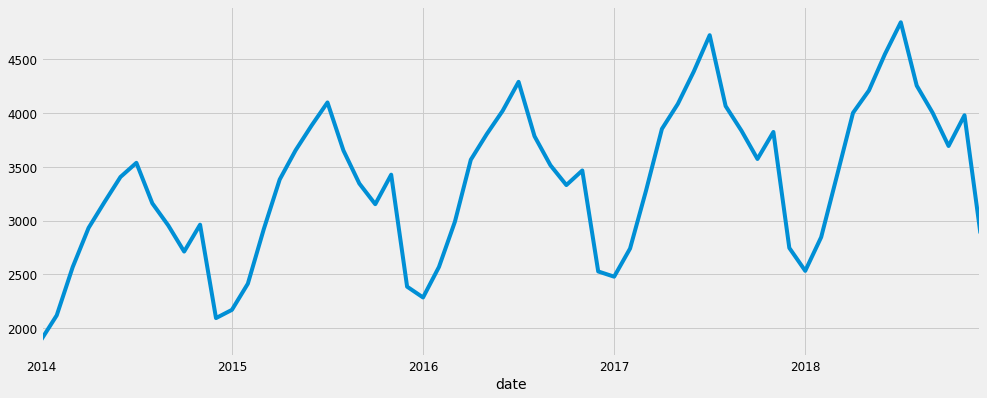

In [106]:
#Indexing with Time Series Data
y.plot(figsize=(15, 6))
plt.show()

# Visualizing our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

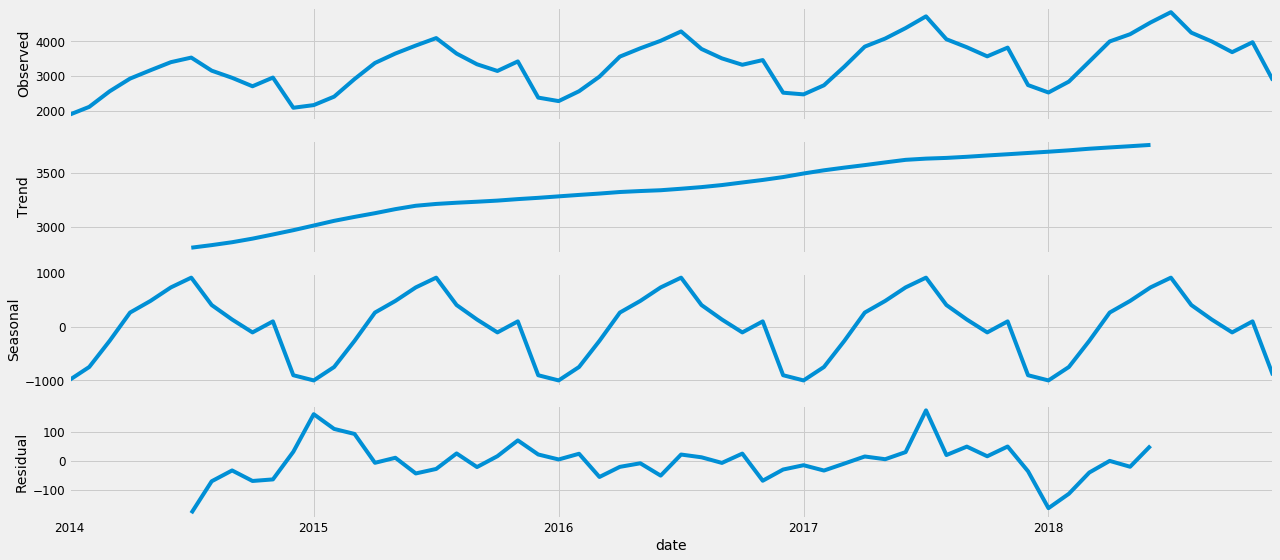

In [107]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# The plot above clearly shows that the sales of hotel is unstable, along with its obvious seasonality.

# Time series forecasting with ARIMA
We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

In [109]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


# Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [80]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1130.4037531077595
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:853.1597514257696
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:664.0299784454763
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1407.429495003226
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:616.3249731932115
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:593.7117287336861
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:463.7836926371424
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1409.6430936838156
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1045.0275672758003
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:787.5245783644909
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:603.3384784866627
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1080.6250526641454
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:585.1857606182627
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:557.444323931321
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:445.6042523300363
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1101.490929501753
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:873.0963701494139
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:661.3491181924542
ARIMA(0

# The above output suggests that SARIMAX(1, 1, 1)x(1, 1, 0, 12) yields the lowest AIC value of 390.12. Therefore we should consider this to be optimal option.

In [110]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5530      0.150      3.697      0.000       0.260       0.846
ma.L1         -1.0000      0.262     -3.821      0.000      -1.513      -0.487
ar.S.L12      -0.2650      0.119     -2.221      0.026      -0.499      -0.031
sigma2      4209.7507   6.22e-05   6.77e+07      0.000    4209.751    4209.751


In [112]:
hotel

,sales
date,
2014-01-01 05:49:12,1742
2014-01-02 05:49:12,1808
2014-01-03 05:49:12,1887
2014-01-04 05:49:12,1983
2014-01-05 05:49:12,2087
...,...
2018-12-27 05:49:12,2624
2018-12-28 05:49:12,2839
2018-12-29 05:49:12,3025


In [114]:
#Forecasting for 2019

futura = results.forecast(steps=12)

In [116]:
#Exporting to csv

futura.to_csv("future2019.csv")

In [115]:
futura.head()

2019-01-01    2742.808814
2019-02-01    3058.668438
2019-03-01    3632.997119
2019-04-01    4215.906019
2019-05-01    4432.980964
Freq: MS, dtype: float64

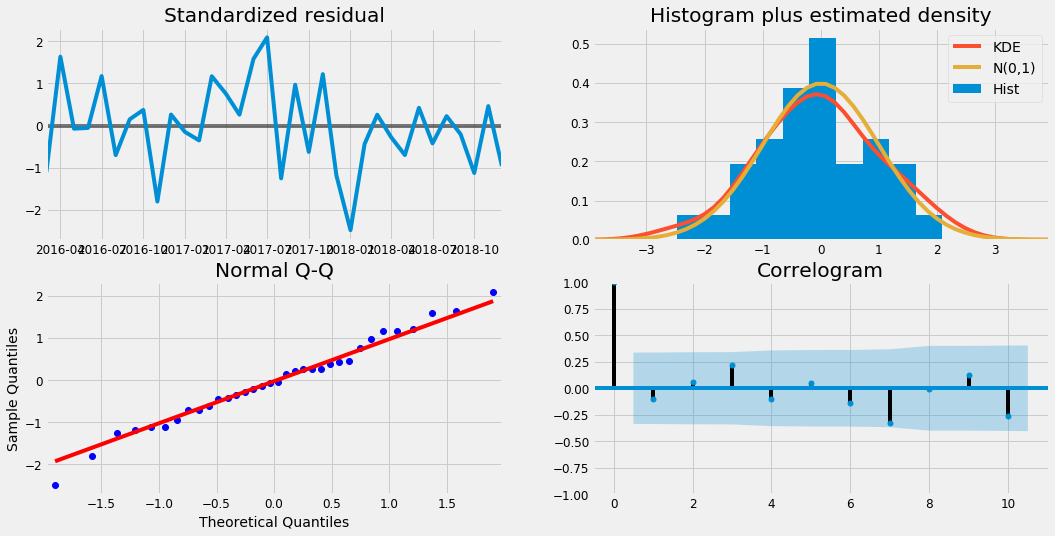

In [82]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

# Validating forecasts
To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2018–01–01 to the end of the data.

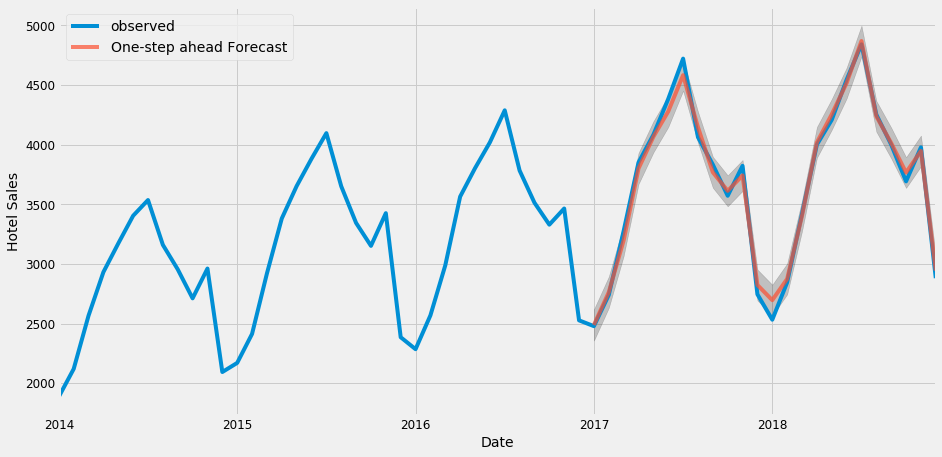

In [94]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Hotel Sales')
plt.legend()

plt.show()

In [84]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4496.62


In [ ]:
@The Mean Squared Error of our forecasts is 4496.62

In [85]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 67.06


# Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 67.06 of the real sales. In my opinion, this is a pretty good model so far.

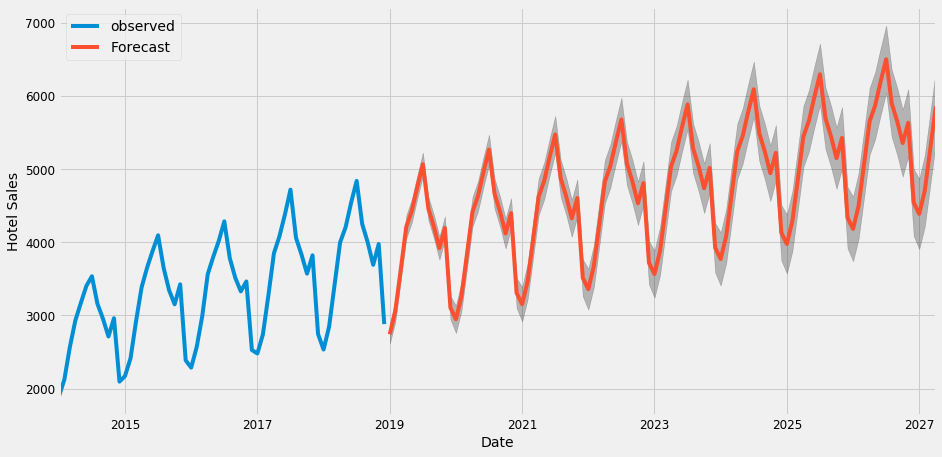

In [87]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Hotel Sales')

plt.legend()
plt.show()

In [92]:
pred_uc

In [90]:
import pickle


In [91]:
with open('timeserieskaran','wb') as f:
    pickle.dump(mod,f)

In [ ]:
#Advice to the  HigherManagement.




This hotel is definitely reaching new heights in the coming years. There is an upward trend in the sales. Ofcourse there is some seasonality involved but looking at the sales goin in positive direction.

The management should look into the fact that why sales are going down at the end of the year and also why there is a sudden drop in sales during mid year, right after summer I believe(July)